In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn import preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv("/content/drive/MyDrive/ICTAK_Notes/House_Pricing.csv")
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [4]:
data.shape

(21613, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [6]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Replacing Missing values

In [7]:
data.isna().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

In [8]:
data['No of Times Visited'].unique()

array([nan, 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [9]:
data['No of Bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [10]:
data['No of Bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  ,  nan, 4.25, 3.75, 0.  , 1.25, 5.25, 6.  ,
       0.5 , 5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [11]:
data['Flat Area (in Sqft)'].unique()

array([1180., 2570.,  770., ..., 3087., 3118., 1425.])

In [12]:
data['Lot Area (in Sqft)'].unique()

array([ 5650.,  7242., 10000., ...,  5813.,  2388.,  1076.])

In [13]:
data['Area of the House from Basement (in Sqft)'].unique()

array([1180., 2170.,  770., 1050., 1680., 3890., 1715., 1060., 1890.,
       1860.,  860., 1430., 1370., 1810., 1980., 1600., 1200., 1250.,
       2330., 2270., 1070., 2450., 1710., 1750., 1400.,  790., 2570.,
       2320., 1190., 1510., 1090., 1280.,  930., 2360.,  890., 2620.,
       2600., 3595., 1570.,  920., 3160.,  990., 2290., 2165., 1640.,
       1000., 2130., 2830., 2250., 2420., 3250., 1850., 1590., 1260.,
       2519., 1540., 1110., 1770., 2720., 2240., 3070., 2380., 2390.,
        880., 1040.,  910., 3450., 2350., 1900., 1010.,  960., 2660.,
       1610.,  765., 3520., 1290., 1960., 1160., 1210., 1270., 1440.,
       2190., 2920., 1460., 1170., 1240., 3140., 2030., 2310.,  700.,
       1080., 2520., 2780., 1560., 1450., 1720., 2910., 1620., 1360.,
       2070., 2460., 1390., 2140., 1320., 1340., 1550.,  940., 1380.,
       3670., 2370., 1130.,  980., 3540., 2500., 1760., 1030., 1780.,
       3400., 2680., 1670., 2590.,  820., 1220., 2440., 2090., 1100.,
       1330., 1420.,

In [14]:
#removing the columns
data.drop(columns=['No of Times Visited'],inplace=True)
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<Axes: xlabel='Sale Price', ylabel='Count'>

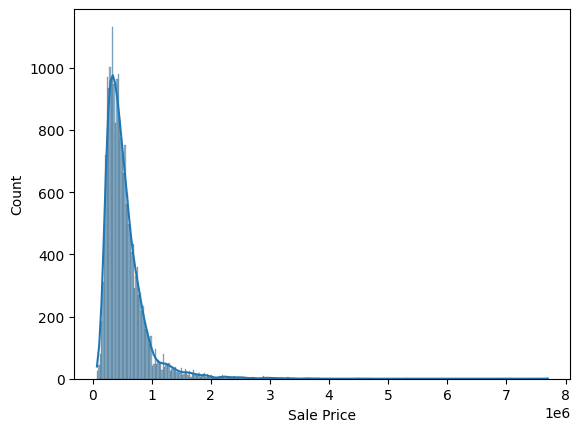

In [15]:
sns.histplot(data['Sale Price'],kde=True)

In [16]:
data['Sale Price'].mode()

0    350000.0
Name: Sale Price, dtype: float64

In [17]:
data['Sale Price'].fillna(data['Sale Price'].mode())

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: Sale Price, Length: 21613, dtype: float64

In [18]:
#fill na values using median
data['Sale Price'].fillna(data['Sale Price'].mode()[0],inplace=True)
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<Axes: xlabel='No of Bathrooms', ylabel='Count'>

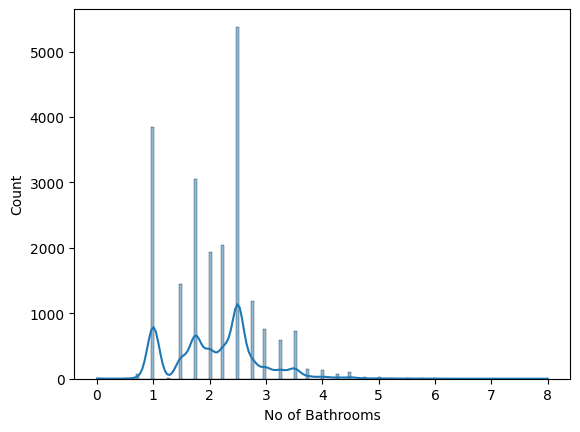

In [19]:
sns.histplot(data['No of Bathrooms'],kde=True)

In [20]:
data['No of Bathrooms'].mode()

0    2.5
Name: No of Bathrooms, dtype: float64

In [21]:
data['No of Bathrooms'].fillna(data['No of Bathrooms'].mode()[0],inplace=True)
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<Axes: xlabel='Flat Area (in Sqft)', ylabel='Count'>

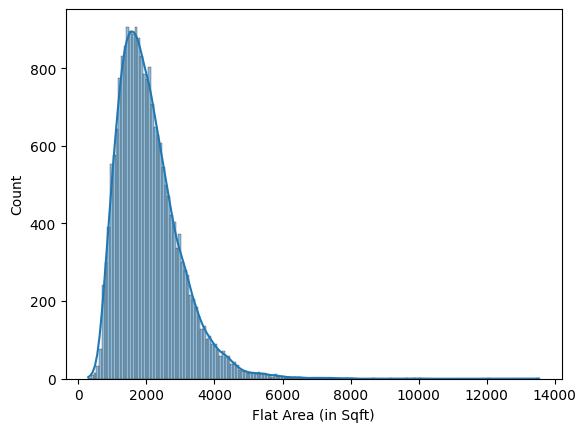

In [22]:
sns.histplot(data['Flat Area (in Sqft)'], kde=True)

In [23]:
data['Flat Area (in Sqft)'].fillna(data['Flat Area (in Sqft)'].mode()[0],inplace=True)
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<Axes: xlabel='Lot Area (in Sqft)', ylabel='Count'>

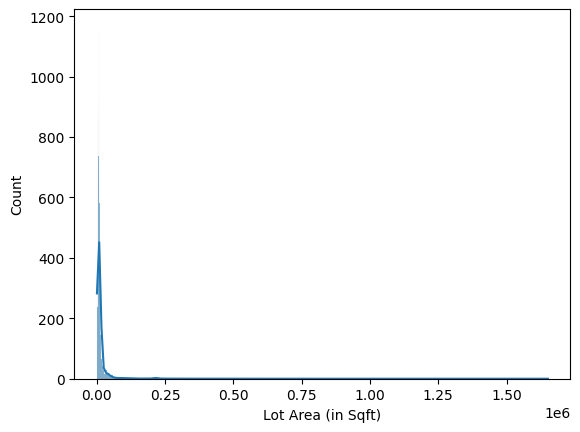

In [24]:
sns.histplot(data['Lot Area (in Sqft)'], kde=True)

In [25]:
data['Lot Area (in Sqft)'].mode()

0    5000.0
Name: Lot Area (in Sqft), dtype: float64

In [26]:
data['Lot Area (in Sqft)'].fillna(data['Lot Area (in Sqft)'].mode()[0],inplace=True)
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<Axes: xlabel='Area of the House from Basement (in Sqft)', ylabel='Count'>

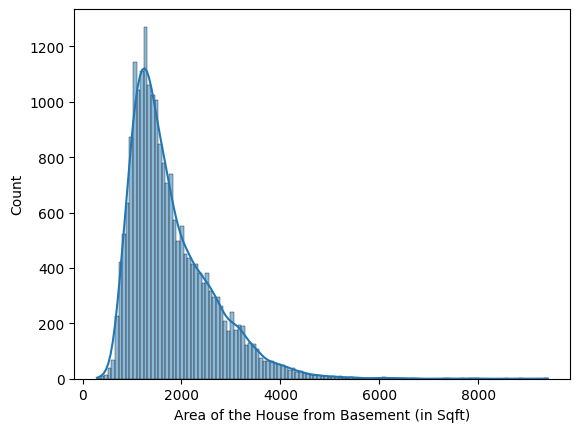

In [27]:
sns.histplot(data['Area of the House from Basement (in Sqft)'], kde=True)

In [28]:
data['Area of the House from Basement (in Sqft)'].mode()

0    1300.0
Name: Area of the House from Basement (in Sqft), dtype: float64

In [29]:
data['Area of the House from Basement (in Sqft)'].fillna(data['Area of the House from Basement (in Sqft)'].mode()[0],inplace=True)
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<Axes: xlabel='Zipcode', ylabel='Count'>

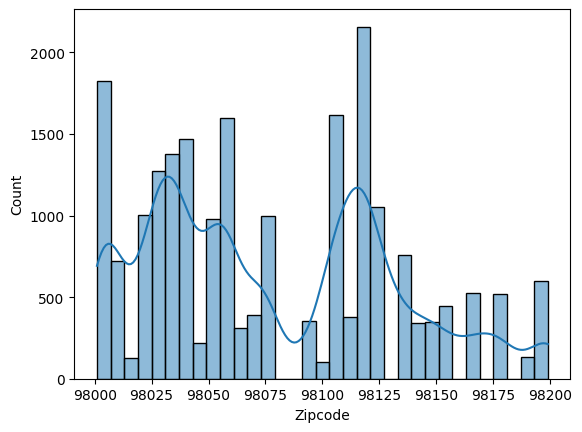

In [30]:
sns.histplot(data['Zipcode'], kde=True)

In [31]:
data['Zipcode'].fillna(data['Zipcode'].mode()[0],inplace=True)
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<Axes: xlabel='Latitude', ylabel='Count'>

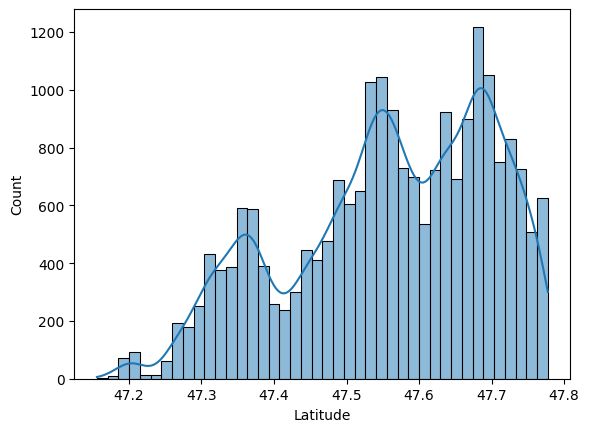

In [32]:
sns.histplot(data['Latitude'], kde=True)

In [33]:
data['Latitude'].fillna(data['Latitude'].mode()[0],inplace=True)
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<Axes: xlabel='Longitude', ylabel='Count'>

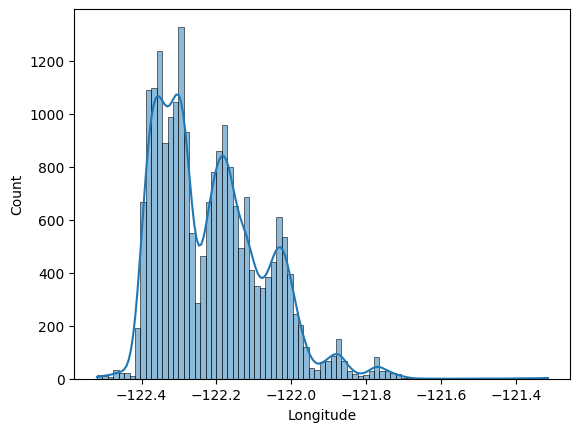

In [34]:
sns.histplot(data['Longitude'], kde=True)

In [35]:
data['Longitude'].fillna(data['Longitude'].mode()[0],inplace=True)
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<Axes: xlabel='Living Area after Renovation (in Sqft)', ylabel='Count'>

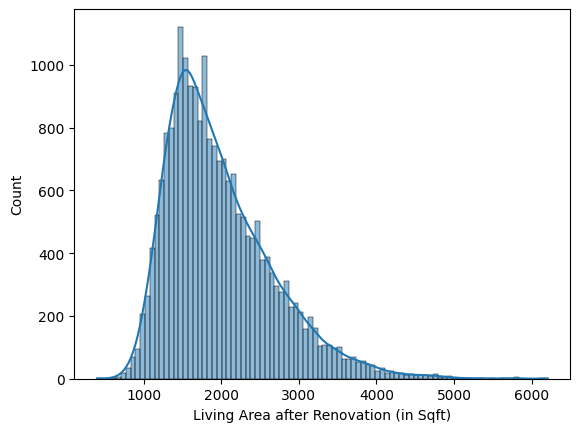

In [36]:
sns.histplot(data['Living Area after Renovation (in Sqft)'], kde=True)

In [37]:
data['Living Area after Renovation (in Sqft)'].fillna(data['Living Area after Renovation (in Sqft)'].mode()[0],inplace=True)
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

# Detecting the outliers

In [38]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401632e+05,3.370842,2.114804,2079.606996,1.510355e+04,1.494309,7.623467,1788.276408,291.509045,46.994864,84.402258,98077.938926,47.560046,-122.213895,1986.518253,12768.455652
std,2.876566e+09,3.673641e+05,0.930062,0.770085,918.434190,4.142015e+04,0.539989,1.105439,827.945124,442.575043,29.373411,401.679240,53.504458,0.138562,0.140827,685.395128,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.616000e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21613 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21613 non-null  float64
 5   Flat Area (in Sqft)                        21613 non-null  float64
 6   Lot Area (in Sqft)                         21613 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   Condition of the House                     21613 non-null  object 
 10  Overall Grade         

In [40]:
data.nunique()

ID                                           21436
Date House was Sold                             13
Sale Price                                    3625
No of Bedrooms                                  13
No of Bathrooms                                 30
Flat Area (in Sqft)                           1036
Lot Area (in Sqft)                            9778
No of Floors                                     6
Waterfront View                                  2
Condition of the House                           5
Overall Grade                                   10
Area of the House from Basement (in Sqft)      946
Basement Area (in Sqft)                        306
Age of House (in Years)                        116
Renovated Year                                  70
Zipcode                                         70
Latitude                                      5034
Longitude                                      752
Living Area after Renovation (in Sqft)         777
Lot Area after Renovation (in S

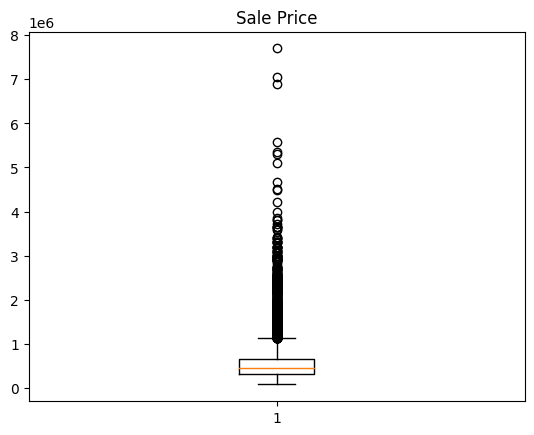

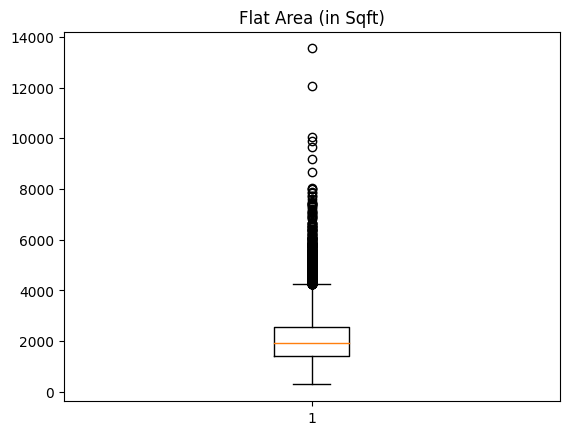

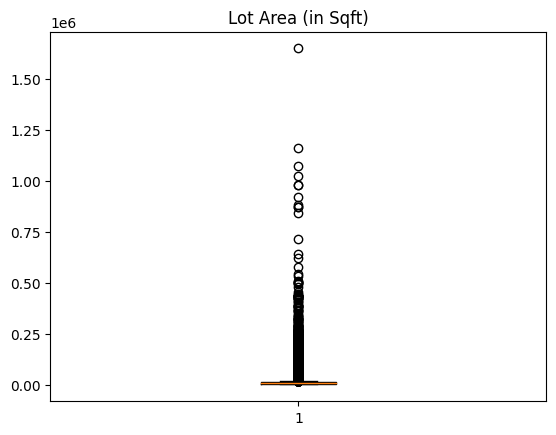

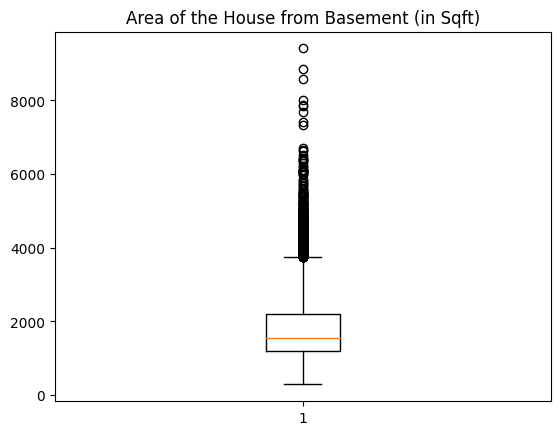

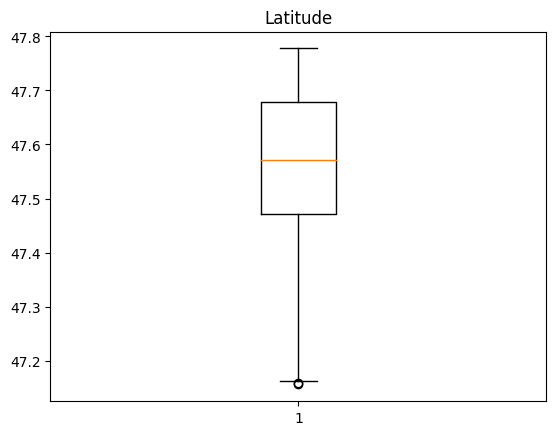

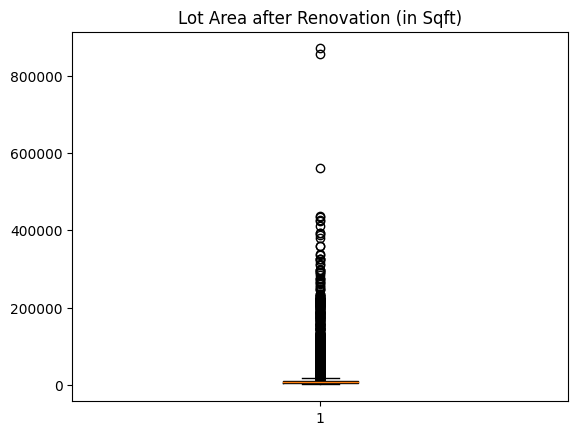

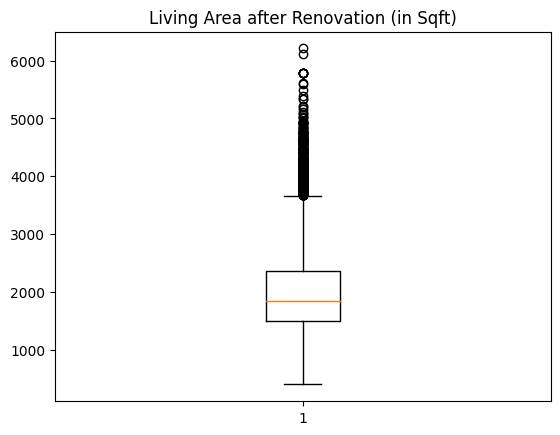

In [41]:
columns_to_fill=['Sale Price','Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)','Latitude','Lot Area after Renovation (in Sqft)','Living Area after Renovation (in Sqft)']
for cols in columns_to_fill:
  plt.figure()
  plt.boxplot(data[cols])
  plt.title(cols)
  plt.show()

Sale price Outlier removing

In [42]:
q1=np.percentile(data['Sale Price'],25,interpolation="midpoint")
q2=np.percentile(data['Sale Price'],50,interpolation="midpoint")
q3=np.percentile(data['Sale Price'],75,interpolation="midpoint")

In [43]:
print(q1,q2,q3)

322000.0 450000.0 645000.0


In [44]:
IQR=q3-q1
IQR

323000.0

In [45]:
min_val=q1-1.5*IQR
max_val=q2+1.5*IQR
print(min_val,max_val)

-162500.0 934500.0


In [46]:
outliers=[]
for x in data['Sale Price']:
  if(x<min_val) or (x>max_val):
    outliers.append(x)
print(outliers)

[1230000.0, 2000000.0, 937000.0, 1350000.0, 951000.0, 975000.0, 1330000.0, 1040000.0, 940000.0, 1100000.0, 1090000.0, 1450000.0, 2250000.0, 1100000.0, 1510000.0, 1070000.0, 1030000.0, 2400000.0, 2900000.0, 1370000.0, 2050000.0, 3080000.0, 2380000.0, 1380000.0, 1400000.0, 940000.0, 950000.0, 1350000.0, 1120000.0, 1550000.0, 1300000.0, 988000.0, 1000000.0, 1030000.0, 1450000.0, 1050000.0, 1200000.0, 1150000.0, 1390000.0, 1070000.0, 1280000.0, 1200000.0, 1490000.0, 1100000.0, 2250000.0, 1600000.0, 970000.0, 2130000.0, 1450000.0, 1950000.0, 1220000.0, 1040000.0, 1120000.0, 1000000.0, 3070000.0, 1250000.0, 1150000.0, 1480000.0, 980000.0, 1580000.0, 985000.0, 1300000.0, 950000.0, 942500.0, 1310000.0, 2250000.0, 1360000.0, 1100000.0, 1220000.0, 2400000.0, 1100000.0, 1100000.0, 1270000.0, 1010000.0, 980000.0, 990000.0, 1200000.0, 971000.0, 1320000.0, 1030000.0, 2450000.0, 980000.0, 1050000.0, 935000.0, 1040000.0, 1240000.0, 986000.0, 1570000.0, 1130000.0, 975000.0, 1200000.0, 1280000.0, 196000

In [47]:
data['Sale Price']=data['Sale Price'].clip(min_val,max_val)

Lot area outlier removing

In [48]:
data['Lot Area (in Sqft)'].mode()

0    5000.0
Name: Lot Area (in Sqft), dtype: float64

In [49]:
q1_lotarea=np.percentile(data['Lot Area (in Sqft)'],25,interpolation="midpoint")
q2_lotarea=np.percentile(data['Lot Area (in Sqft)'],50,interpolation="midpoint")
q3_lotarea=np.percentile(data['Lot Area (in Sqft)'],75,interpolation="midpoint")

In [50]:
print(q1_lotarea,q2_lotarea,q3_lotarea)

5040.0 7616.0 10685.0


In [51]:
IQR_lotarea=q3_lotarea-q1_lotarea
IQR_lotarea

5645.0

In [52]:
min_val_lotarea=q1-1.5*IQR_lotarea
max_val_lotarea=q2+1.5*IQR_lotarea
print(min_val_lotarea,max_val_lotarea)

313532.5 458467.5


In [53]:
outliers=[]
for x in data['Lot Area (in Sqft)']:
  if(x<min_val_lotarea) or (x>max_val_lotarea):
    outliers.append(x)
print(outliers)

[5650.0, 7242.0, 10000.0, 5000.0, 8080.0, 101930.0, 6819.0, 9711.0, 7470.0, 6560.0, 9796.0, 6000.0, 19901.0, 9680.0, 4850.0, 5000.0, 14040.0, 4300.0, 9850.0, 9774.0, 4980.0, 44867.0, 6300.0, 9643.0, 6500.0, 4697.0, 2691.0, 1581.0, 6380.0, 7173.0, 3980.0, 1265.0, 5000.0, 3000.0, 6659.0, 3060.0, 34848.0, 6000.0, 8075.0, 7553.0, 5520.0, 24186.0, 5639.0, 2280.0, 9656.0, 13603.0, 8528.0, 13416.0, 5963.0, 65005.0, 9199.0, 9134.0, 4080.0, 8550.0, 6000.0, 5000.0, 4495.0, 4750.0, 14342.0, 9976.0, 21235.0, 8400.0, 8690.0, 1044.0, 6000.0, 3809.0, 11049.0, 4648.0, 12070.0, 20158.0, 50094.0, 5612.0, 7807.0, 5000.0, 50529.0, 35102.0, 7300.0, 5060.0, 5060.0, 39683.0, 5100.0, 5889.0, 6720.0, 8712.0, 6634.0, 3600.0, 8400.0, 6278.0, 2040.0, 1066.0, 7403.0, 6353.0, 10500.0, 5000.0, 5000.0, 10250.0, 15681.0, 6400.0, 41800.0, 36847.0, 13241.0, 3478.0, 107593.0, 8113.0, 33919.0, 10005.0, 4005.0, 2493.0, 28037.0, 12342.0, 9624.0, 3328.0, 12600.0, 5969.0, 16171.0, 6350.0, 1102.0, 6780.0, 9600.0, 2982.0, 6474.

In [54]:
data['Lot Area (in Sqft)']=data['Lot Area (in Sqft)'].clip(min_val_lotarea,max_val_lotarea)

In [55]:
data['Living Area after Renovation (in Sqft)'].describe()

count    21613.000000
mean      1986.518253
std        685.395128
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: Living Area after Renovation (in Sqft), dtype: float64

In [56]:
data['Lot Area after Renovation (in Sqft)'].describe()

count     21613.000000
mean      12768.455652
std       27304.179631
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: Lot Area after Renovation (in Sqft), dtype: float64

# Encoding

In [57]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,313532.5,1.0,No,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,313532.5,2.0,No,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,313532.5,1.0,No,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,313532.5,1.0,No,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,313532.5,1.0,No,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21613 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21613 non-null  float64
 5   Flat Area (in Sqft)                        21613 non-null  float64
 6   Lot Area (in Sqft)                         21613 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   Condition of the House                     21613 non-null  object 
 10  Overall Grade         

In [59]:
data.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                      float64
Latitude                                     float64
Longitude                                    float64
Living Area after Renovation (in Sqft)       f

In [60]:
data['Waterfront View'].nunique()

2

In [61]:
from datetime import datetime

In [62]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,313532.5,1.0,No,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,313532.5,2.0,No,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,313532.5,1.0,No,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,313532.5,1.0,No,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,313532.5,1.0,No,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [63]:
data['Date House was Sold'] = pd.to_datetime(data['Date House was Sold'], format='%d %B %Y')

In [64]:
data['Year'] = data['Date House was Sold'].dt.year
data['Month'] = data['Date House was Sold'].dt.month
data['Day'] = data['Date House was Sold'].dt.day
print(data)

               ID Date House was Sold  Sale Price  No of Bedrooms  \
0      7129300520          2017-10-14    221900.0               3   
1      6414100192          2017-12-14    538000.0               3   
2      5631500400          2016-02-15    180000.0               2   
3      2487200875          2017-12-14    604000.0               4   
4      1954400510          2016-02-15    510000.0               3   
...           ...                 ...         ...             ...   
21608   263000018          2017-05-14    360000.0               3   
21609  6600060120          2016-02-15    400000.0               4   
21610  1523300141          2017-06-14    402101.0               2   
21611   291310100          2016-01-15    400000.0               3   
21612  1523300157          2017-10-14    325000.0               2   

       No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors  \
0                 1.00               1180.0            313532.5           1.0   
1        

In [65]:
data.drop('Date House was Sold',axis=1,inplace=True)
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year,Month,Day
0,7129300520,221900.0,3,1.00,1180.0,313532.5,1.0,No,Fair,7,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,2017,10,14
1,6414100192,538000.0,3,2.25,2570.0,313532.5,2.0,No,Fair,7,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,2017,12,14
2,5631500400,180000.0,2,1.00,770.0,313532.5,1.0,No,Fair,6,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,2016,2,15
3,2487200875,604000.0,4,3.00,1960.0,313532.5,1.0,No,Excellent,7,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,2017,12,14
4,1954400510,510000.0,3,2.00,1680.0,313532.5,1.0,No,Fair,8,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,2016,2,15


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Sale Price                                 21613 non-null  float64
 2   No of Bedrooms                             21613 non-null  int64  
 3   No of Bathrooms                            21613 non-null  float64
 4   Flat Area (in Sqft)                        21613 non-null  float64
 5   Lot Area (in Sqft)                         21613 non-null  float64
 6   No of Floors                               21613 non-null  float64
 7   Waterfront View                            21613 non-null  object 
 8   Condition of the House                     21613 non-null  object 
 9   Overall Grade                              21613 non-null  int64  
 10  Area of the House from

In [67]:
#seperating the categorical values
#categorical_cols=['Date House was Sold','Waterfront View','Condition of the House']
#numerical_cols=['ID','Sale Price','No of Bedrooms','No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','No of Floors','Overall Grade','Area of the House from Basement (in Sqft)','Basement Area (in Sqft)','Age of House (in Years)','Renovated Year','Zipcode','Latitude','Longitude','Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)']

In [68]:
categorical_cols=['Waterfront View','Condition of the House','Year','Month','Day']

In [69]:
data_encoded=pd.get_dummies(data,columns=categorical_cols,dtype=int,drop_first=True)
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Sale Price                                 21613 non-null  float64
 2   No of Bedrooms                             21613 non-null  int64  
 3   No of Bathrooms                            21613 non-null  float64
 4   Flat Area (in Sqft)                        21613 non-null  float64
 5   Lot Area (in Sqft)                         21613 non-null  float64
 6   No of Floors                               21613 non-null  float64
 7   Overall Grade                              21613 non-null  int64  
 8   Area of the House from Basement (in Sqft)  21613 non-null  float64
 9   Basement Area (in Sqft)                    21613 non-null  int64  
 10  Age of House (in Years

In [70]:
numerical_cols=['ID','Sale Price','No of Bedrooms','No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','No of Floors','Overall Grade','Area of the House from Basement (in Sqft)','Basement Area (in Sqft)','Age of House (in Years)','Renovated Year','Zipcode','Latitude','Longitude','Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)']

In [71]:
data_encoded.shape

(21613, 35)

In [72]:
#standard Scaler (normal distribution data)
data_std_scaled=data_encoded.copy()

std_scaler=StandardScaler()
data_std_scaled[numerical_cols]=std_scaler.fit_transform(data_std_scaled[numerical_cols])
data_std_scaled.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Day_15
0,0.886146,-1.248445,-0.398737,-1.447671,-0.979523,-0.050055,-0.915427,-0.564013,-0.734699,-0.658681,...,0,0,0,0,0,0,1,0,0,0
1,0.637511,0.177083,-0.398737,0.175564,0.533957,-0.050055,0.936506,-0.564013,0.461060,0.245141,...,0,0,0,0,0,0,0,0,1,0
2,0.365444,-1.437403,-1.473959,-1.447671,-1.425946,-0.050055,-0.915427,-1.468651,-1.229912,-0.658681,...,0,0,0,0,0,0,0,0,0,1
3,-0.727656,0.474725,0.676485,1.149506,-0.130232,-0.050055,-0.915427,-0.564013,-0.891718,1.397515,...,0,0,0,0,0,0,0,0,1,0
4,-0.912881,0.050810,-0.398737,-0.149083,-0.435106,-0.050055,-0.915427,0.340626,-0.130780,-0.658681,...,0,0,0,0,0,0,0,0,0,1


In [73]:
data_std_scaled.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Day_15
count,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,1.144075e-16,-1.183526e-16,2.367051e-16,-3.156068e-17,-1.052023e-17,8.718638e-16,-3.156068e-17,2.367051e-16,1.262427e-16,6.838148e-17,...,0.103225,0.111692,0.100865,0.102300,0.089761,0.082080,0.086892,0.065285,0.068061,0.322954
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,...,0.304259,0.314994,0.301157,0.303049,0.285845,0.274493,0.281683,0.247033,0.251856,0.467616
min,-1.591970e+00,-1.910925e+00,-3.624404e+00,-2.746259e+00,-1.948586e+00,-5.005504e-02,-9.154270e-01,-5.991845e+00,-1.809674e+00,-6.586810e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.542511e-01,-7.970204e-01,-3.987371e-01,-4.737296e-01,-7.182031e-01,-5.005504e-02,-9.154270e-01,-5.640127e-01,-7.226207e-01,-6.586810e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.347893e-01,-2.197742e-01,-3.987371e-01,1.755645e-01,-1.846740e-01,-5.005504e-02,1.053939e-02,-5.640127e-01,-2.757208e-01,-6.586810e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.485833e-01,6.596243e-01,6.764851e-01,5.002115e-01,5.121803e-01,-5.005504e-02,9.365058e-01,3.406260e-01,5.093736e-01,6.066704e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.849366e+00,1.965193e+00,3.185793e+01,7.642446e+00,1.247848e+01,2.353792e+01,3.714405e+00,2.149903e+00,9.205803e+00,1.023238e+01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
#Minmax scaler (skewed data)
data_minmax_scaled=data_encoded.copy()

minmax_scaler=MinMaxScaler()
data_minmax_scaled[numerical_cols]=std_scaler.fit_transform(data_minmax_scaled[numerical_cols])
data_minmax_scaled.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Day_15
0,0.886146,-1.248445,-0.398737,-1.447671,-0.979523,-0.050055,-0.915427,-0.564013,-0.734699,-0.658681,...,0,0,0,0,0,0,1,0,0,0
1,0.637511,0.177083,-0.398737,0.175564,0.533957,-0.050055,0.936506,-0.564013,0.461060,0.245141,...,0,0,0,0,0,0,0,0,1,0
2,0.365444,-1.437403,-1.473959,-1.447671,-1.425946,-0.050055,-0.915427,-1.468651,-1.229912,-0.658681,...,0,0,0,0,0,0,0,0,0,1
3,-0.727656,0.474725,0.676485,1.149506,-0.130232,-0.050055,-0.915427,-0.564013,-0.891718,1.397515,...,0,0,0,0,0,0,0,0,1,0
4,-0.912881,0.050810,-0.398737,-0.149083,-0.435106,-0.050055,-0.915427,0.340626,-0.130780,-0.658681,...,0,0,0,0,0,0,0,0,0,1


In [75]:
data_minmax_scaled.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Day_15
count,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,1.144075e-16,-1.183526e-16,2.367051e-16,-3.156068e-17,-1.052023e-17,8.718638e-16,-3.156068e-17,2.367051e-16,1.262427e-16,6.838148e-17,...,0.103225,0.111692,0.100865,0.102300,0.089761,0.082080,0.086892,0.065285,0.068061,0.322954
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,...,0.304259,0.314994,0.301157,0.303049,0.285845,0.274493,0.281683,0.247033,0.251856,0.467616
min,-1.591970e+00,-1.910925e+00,-3.624404e+00,-2.746259e+00,-1.948586e+00,-5.005504e-02,-9.154270e-01,-5.991845e+00,-1.809674e+00,-6.586810e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.542511e-01,-7.970204e-01,-3.987371e-01,-4.737296e-01,-7.182031e-01,-5.005504e-02,-9.154270e-01,-5.640127e-01,-7.226207e-01,-6.586810e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.347893e-01,-2.197742e-01,-3.987371e-01,1.755645e-01,-1.846740e-01,-5.005504e-02,1.053939e-02,-5.640127e-01,-2.757208e-01,-6.586810e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.485833e-01,6.596243e-01,6.764851e-01,5.002115e-01,5.121803e-01,-5.005504e-02,9.365058e-01,3.406260e-01,5.093736e-01,6.066704e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.849366e+00,1.965193e+00,3.185793e+01,7.642446e+00,1.247848e+01,2.353792e+01,3.714405e+00,2.149903e+00,9.205803e+00,1.023238e+01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
#Correlation of orginal data data
corr_columns=['ID','Sale Price','No of Bedrooms','No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','No of Floors','Overall Grade','Area of the House from Basement (in Sqft)','Basement Area (in Sqft)','Age of House (in Years)','Renovated Year','Zipcode','Latitude','Longitude','Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)']
orginal_data_cor=data_encoded[corr_columns].corr()
orginal_data_cor

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
ID,1.000000,-0.004939,0.001286,0.005082,-0.012403,-0.048481,0.018525,0.013799,-0.010770,-0.005151,-0.021380,-0.016907,-0.008244,-0.001968,0.020800,-0.002867,-0.138798
Sale Price,-0.004939,1.000000,0.338694,0.523993,0.674641,0.037804,0.302847,0.677812,0.590782,0.294557,-0.065602,0.114455,-0.038640,0.429818,0.055336,0.618880,0.092891
No of Bedrooms,0.001286,0.338694,1.000000,0.515847,0.576528,-0.008106,0.175429,0.349008,0.477575,0.303093,-0.154178,0.018841,-0.152664,-0.008865,0.129480,0.391655,0.029244
No of Bathrooms,0.005082,0.523993,0.515847,1.000000,0.754453,0.029178,0.500593,0.635535,0.685051,0.283779,-0.505956,0.050732,-0.203881,0.024505,0.223083,0.568538,0.087204
Flat Area (in Sqft),-0.012403,0.674641,0.576528,0.754453,1.000000,0.041883,0.353793,0.705554,0.876056,0.435119,-0.317849,0.055430,-0.199365,0.052515,0.240072,0.756060,0.183248
Lot Area (in Sqft),-0.048481,0.037804,-0.008106,0.029178,0.041883,1.000000,0.012198,0.025290,0.049097,-0.004953,-0.011575,0.002505,-0.037818,-0.052557,0.070725,0.011230,0.363351
No of Floors,0.018525,0.302847,0.175429,0.500593,0.353793,0.012198,1.000000,0.461228,0.523821,-0.245705,-0.489319,0.006338,-0.059121,0.049656,0.125411,0.279837,-0.011269
Overall Grade,0.013799,0.677812,0.349008,0.635535,0.705554,0.025290,0.461228,1.000000,0.705031,0.145266,-0.456629,0.010440,-0.185827,0.111305,0.201756,0.681320,0.107581
Area of the House from Basement (in Sqft),-0.010770,0.590782,0.477575,0.685051,0.876056,0.049097,0.523821,0.705031,1.000000,-0.051859,-0.423774,0.023318,-0.261082,-0.000913,0.343810,0.731923,0.194111
Basement Area (in Sqft),-0.005151,0.294557,0.303093,0.283779,0.435119,-0.004953,-0.245705,0.145266,-0.051859,1.000000,0.133124,0.071323,0.074849,0.110557,-0.144754,0.200387,0.017276


In [77]:
#Correlation of  data standard scaling
corr_columns=['ID','Sale Price','No of Bedrooms','No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','No of Floors','Overall Grade','Area of the House from Basement (in Sqft)','Basement Area (in Sqft)','Age of House (in Years)','Renovated Year','Zipcode','Latitude','Longitude','Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)']
scaled_data_cor=data_std_scaled[corr_columns].corr()
scaled_data_cor

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
ID,1.000000,-0.004939,0.001286,0.005082,-0.012403,-0.048481,0.018525,0.013799,-0.010770,-0.005151,-0.021380,-0.016907,-0.008244,-0.001968,0.020800,-0.002867,-0.138798
Sale Price,-0.004939,1.000000,0.338694,0.523993,0.674641,0.037804,0.302847,0.677812,0.590782,0.294557,-0.065602,0.114455,-0.038640,0.429818,0.055336,0.618880,0.092891
No of Bedrooms,0.001286,0.338694,1.000000,0.515847,0.576528,-0.008106,0.175429,0.349008,0.477575,0.303093,-0.154178,0.018841,-0.152664,-0.008865,0.129480,0.391655,0.029244
No of Bathrooms,0.005082,0.523993,0.515847,1.000000,0.754453,0.029178,0.500593,0.635535,0.685051,0.283779,-0.505956,0.050732,-0.203881,0.024505,0.223083,0.568538,0.087204
Flat Area (in Sqft),-0.012403,0.674641,0.576528,0.754453,1.000000,0.041883,0.353793,0.705554,0.876056,0.435119,-0.317849,0.055430,-0.199365,0.052515,0.240072,0.756060,0.183248
Lot Area (in Sqft),-0.048481,0.037804,-0.008106,0.029178,0.041883,1.000000,0.012198,0.025290,0.049097,-0.004953,-0.011575,0.002505,-0.037818,-0.052557,0.070725,0.011230,0.363351
No of Floors,0.018525,0.302847,0.175429,0.500593,0.353793,0.012198,1.000000,0.461228,0.523821,-0.245705,-0.489319,0.006338,-0.059121,0.049656,0.125411,0.279837,-0.011269
Overall Grade,0.013799,0.677812,0.349008,0.635535,0.705554,0.025290,0.461228,1.000000,0.705031,0.145266,-0.456629,0.010440,-0.185827,0.111305,0.201756,0.681320,0.107581
Area of the House from Basement (in Sqft),-0.010770,0.590782,0.477575,0.685051,0.876056,0.049097,0.523821,0.705031,1.000000,-0.051859,-0.423774,0.023318,-0.261082,-0.000913,0.343810,0.731923,0.194111
Basement Area (in Sqft),-0.005151,0.294557,0.303093,0.283779,0.435119,-0.004953,-0.245705,0.145266,-0.051859,1.000000,0.133124,0.071323,0.074849,0.110557,-0.144754,0.200387,0.017276


In [78]:
#Correlation of  data Min max scaling
corr_columns=['ID','Sale Price','No of Bedrooms','No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','No of Floors','Overall Grade','Area of the House from Basement (in Sqft)','Basement Area (in Sqft)','Age of House (in Years)','Renovated Year','Zipcode','Latitude','Longitude','Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)']
minmax_data_cor=data_minmax_scaled[corr_columns].corr()
minmax_data_cor

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
ID,1.000000,-0.004939,0.001286,0.005082,-0.012403,-0.048481,0.018525,0.013799,-0.010770,-0.005151,-0.021380,-0.016907,-0.008244,-0.001968,0.020800,-0.002867,-0.138798
Sale Price,-0.004939,1.000000,0.338694,0.523993,0.674641,0.037804,0.302847,0.677812,0.590782,0.294557,-0.065602,0.114455,-0.038640,0.429818,0.055336,0.618880,0.092891
No of Bedrooms,0.001286,0.338694,1.000000,0.515847,0.576528,-0.008106,0.175429,0.349008,0.477575,0.303093,-0.154178,0.018841,-0.152664,-0.008865,0.129480,0.391655,0.029244
No of Bathrooms,0.005082,0.523993,0.515847,1.000000,0.754453,0.029178,0.500593,0.635535,0.685051,0.283779,-0.505956,0.050732,-0.203881,0.024505,0.223083,0.568538,0.087204
Flat Area (in Sqft),-0.012403,0.674641,0.576528,0.754453,1.000000,0.041883,0.353793,0.705554,0.876056,0.435119,-0.317849,0.055430,-0.199365,0.052515,0.240072,0.756060,0.183248
Lot Area (in Sqft),-0.048481,0.037804,-0.008106,0.029178,0.041883,1.000000,0.012198,0.025290,0.049097,-0.004953,-0.011575,0.002505,-0.037818,-0.052557,0.070725,0.011230,0.363351
No of Floors,0.018525,0.302847,0.175429,0.500593,0.353793,0.012198,1.000000,0.461228,0.523821,-0.245705,-0.489319,0.006338,-0.059121,0.049656,0.125411,0.279837,-0.011269
Overall Grade,0.013799,0.677812,0.349008,0.635535,0.705554,0.025290,0.461228,1.000000,0.705031,0.145266,-0.456629,0.010440,-0.185827,0.111305,0.201756,0.681320,0.107581
Area of the House from Basement (in Sqft),-0.010770,0.590782,0.477575,0.685051,0.876056,0.049097,0.523821,0.705031,1.000000,-0.051859,-0.423774,0.023318,-0.261082,-0.000913,0.343810,0.731923,0.194111
Basement Area (in Sqft),-0.005151,0.294557,0.303093,0.283779,0.435119,-0.004953,-0.245705,0.145266,-0.051859,1.000000,0.133124,0.071323,0.074849,0.110557,-0.144754,0.200387,0.017276
